# Testing Assumptions
## 1. State Assumptions

The following are our assumptions:
* Unmasked is independent of weighted number of  synapses
* Weighted number of synapses is independent of $X$ and $Y$
* Bins are i.i.d.
* Grid means are i.i.d.
* Class conditional difference between layers

## 2. Check Assumptions

For testing unmasked is independent of weighted number of synapses, check the off diagonal covariance is approximately 0 or use the scatter plo
t to see the trend.  
$\#\text{{weighted}} \perp\!\!\!\perp  \#\text{{unmasked}}$
  
For testing weighted number of sympses is independent of $X$ and $Y$, repeat the above steps.   
$\#\text{{weighted}} \perp\!\!\!\perp  X_i$  
$\#\text{{weighted}} \perp\!\!\!\perp  Y_i$

For testing bins and grid means are iid, check the off diagonal and optimal number of clusters.    
$u_i\overset{iid}{\sim}F$, where $u_i$ is the bins.  
$(u_1, u_2, ..., u_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For testing grid means are iid, repeat the above steps.  
$w_i\overset{iid}{\sim}F$, where $w_i$ is the grid means.  
$(w_1, w_2, ..., w_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For conditional differences between layers, fit the model using least squares regression and check the residual plot.  
$y = \beta x + \epsilon, \epsilon {\sim}Normal(\mu, \epsilon)$
$\|y - \beta x\| - \epsilon {\sim} Normal(\mu, \epsilon), p_1 \neq p_2$ 


In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.mixture
import scipy.stats as ss
import seaborn as sns

np.random.seed(12345678)  # for reproducibility, set random seed

# Read in data
df = pd.read_csv('../output.csv')

nvox = 64*64*48 # assume number of voxels per bin
df['weighted'] = df['synapses']/df['unmasked']*nvox

### a. Bin data from Assignment 4
#### i. Independence assumption of unmasked vs. weighted data

nvox =  196608
At voxel threshold at  0 % ( 0  voxels), corr(weighted, unmasked) =  0.749534793269 , p-value =  0.0
At voxel threshold at  5.0 % ( 9830.4  voxels), corr(weighted, unmasked) =  0.583594900825 , p-value =  0.0
At voxel threshold at  10.0 % ( 19660.8  voxels), corr(weighted, unmasked) =  0.531995275996 , p-value =  0.0
At voxel threshold at  20.0 % ( 39321.6  voxels), corr(weighted, unmasked) =  0.472679369571 , p-value =  0.0
At voxel threshold at  30.0 % ( 58982.4  voxels), corr(weighted, unmasked) =  0.44130818825 , p-value =  0.0
At voxel threshold at  50.0 % ( 98304.0  voxels), corr(weighted, unmasked) =  0.351300754241 , p-value =  0.0
At voxel threshold at  70.0 % ( 137625.6  voxels), corr(weighted, unmasked) =  0.0188337842646 , p-value =  0.00138806789045


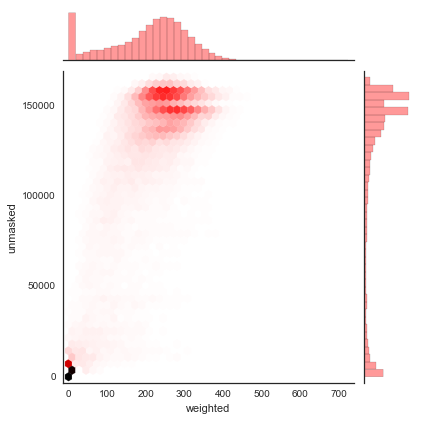

In [2]:
print "nvox = ", nvox
df['weighted'] = df['synapses']/df['unmasked']*nvox
syn_wt = df['weighted']
unmask = df['unmasked']

with sns.axes_style('white'):
    sns.jointplot(x=syn_wt, y=unmask, kind='hex', color='r', 
                  xlim=(syn_wt.min()-0.02*np.ptp(syn_wt),syn_wt.max()+0.02*np.ptp(syn_wt)), 
                  ylim=(unmask.min()-0.02*np.ptp(unmask),unmask.max()+0.02*np.ptp(unmask)),
                  joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);

for voxThreshProp in [0, .05, .1, .2, .3, .5, .7]:
    voxThresh = nvox*voxThreshProp
    dfthr = df[df['unmasked']>voxThresh] # Thresholded data frame
    syn_wt_thresh = dfthr['weighted']
    unmask_thresh = dfthr['unmasked']

    [corr_thresh,p_thresh] = ss.pearsonr(syn_wt_thresh,y=unmask_thresh)
    print "At voxel threshold at ", voxThreshProp*100, "% (", voxThresh, " voxels), corr(weighted, unmasked) = ", corr_thresh, ", p-value = ", p_thresh

The scatterplot indicates a positive relationship between "unmasked" and "weighted" variables across the entire range of data.  This means that for bins with a greater amount of masked voxels, even linearly scaling up the number of marked synapses does not match the number of scaled synapses of bins with less mased voxels. 
However, the density plot also shows that most of the data lies in a region with relatively high "unmasked" and "weighted". Visually, it seems that the data in this region is has little correlation between unmasked and weighted. Examining the correlations at different threshold levels (considering only the data with amount of unmasked voxels > "thresh") confirms this. The correlations steadily drop as we consider less of the data in the "tail" region, and more of the data in the densly populated region. 
In our previous assumption, we placed the threshold at 50% of the total voxels, which has a modest correlation of .35. If the independence of unmasked and weighted is critically important to us, we should increase the threshold to 70% which now includes just the dense region and a low correlation of .018.

#### ii. Independence assumption of weighted data

In [3]:
dfthr = df[df['unmasked'] > nvox * 0.5]
Zvalue = np.unique(dfthr['cz'])
minlen = 100000

for i in Zvalue:
    temp = len(dfthr[dfthr['cz'] == i])
    if temp < minlen:
        minlen = temp

for i in Zvalue:
    if i == 55:
        temp = dfthr[dfthr['cz'] == i]['weighted']
        out = np.random.choice(temp, minlen)
    else :
        temp = dfthr[dfthr['cz'] == i]['weighted']
        sample = np.random.choice(temp, minlen)
        out = np.column_stack((out, sample))

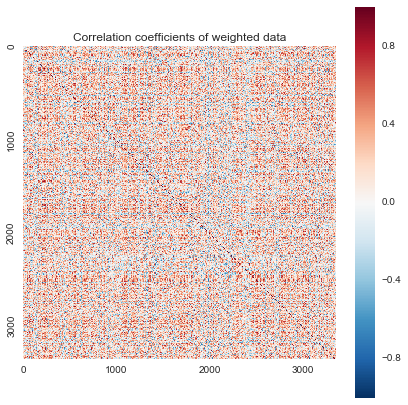

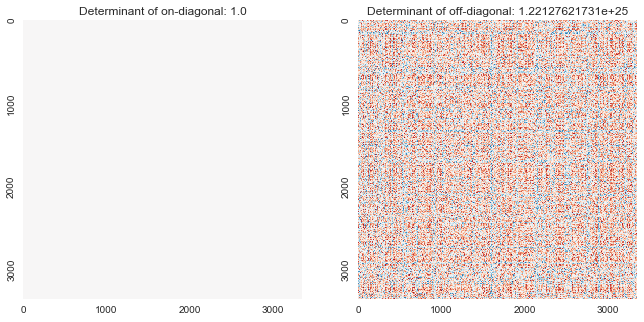

Ratio of on- and off-diagonal determinants: 8.18815584734e-26


In [4]:
corr = np.corrcoef(out)

plt.figure(figsize=(7,7))
sns.heatmap(corr, square=True, xticklabels=1000, yticklabels=1000)
plt.title('Correlation coefficients of weighted data')
plt.show()

diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
sns.heatmap(diag, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=1000, yticklabels=1000)
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
sns.heatmap(hollow, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=1000, yticklabels=1000)
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

Clearly from the result we know that the weighted data is not independent because it does not have 0 on off-diagonal.

#### iii. Identically distributed assumption of weighted data

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


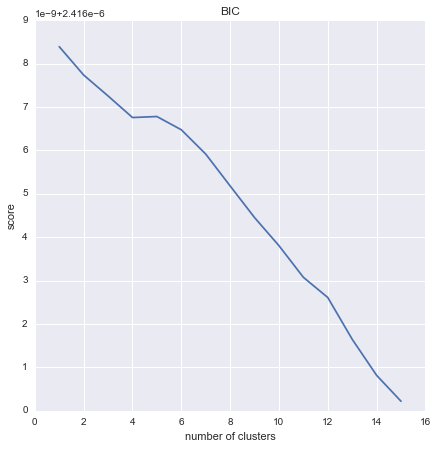

[ 412474.89250565  412586.06954552  412668.16000173  412752.82220682
  412748.90871766  412800.88106781  412896.25354306  413021.43545043
  413145.90703098  413256.44912632  413380.99043654  413460.51651629
  413625.02626714  413767.28767452  413869.56160221]


In [5]:
import sklearn.mixture
i = np.linspace(1, 15, 15, dtype = 'int')
print i
bic = np.array(())
for idx in i:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out)
    bic = np.append(bic, gmm.bic(out))
plt.figure(figsize=(7, 7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is 1, we conclude the weighted data are identical.

### b. Grid data from Assignment 5

In [6]:
import pickle

# Read labels
with open('Z_labels.pickle') as f:
    zvals, labels = pickle.load(f)

# Read grid means
with open('grid_data.pickle') as f:
    grid_means, grid_x, grid_y, grid_z = pickle.load(f)

#### i. Independence assumption of grid means and X,Y position

correlation between grid_means and grid_x:  0.132234138647 , p-value:  1.08221419313e-05
correlation between grid_means and grid_y:  -0.506803575487 , p-value:  7.88129705477e-73


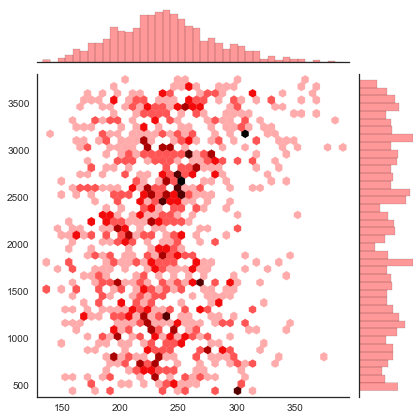

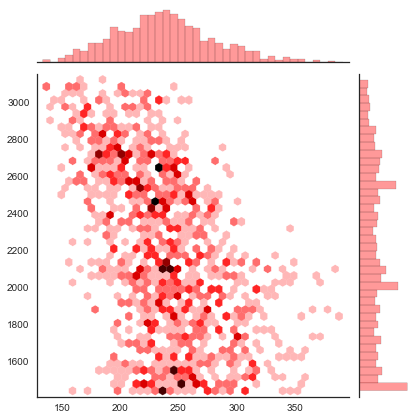

In [7]:
[corrX,pX]= ss.pearsonr(grid_means,grid_x)
print "correlation between grid_means and grid_x: ", corrX, ", p-value: ", pX

[corrY,pY]= ss.pearsonr(grid_means,grid_y)
print "correlation between grid_means and grid_y: ", corrY, ", p-value: ", pY

with sns.axes_style('white'):
    sns.jointplot(x=grid_means, y=np.array(grid_x).astype(np.float64), kind='hex', color='r', 
                  xlim=(np.min(grid_means)-0.02*np.ptp(grid_means),np.max(grid_means)+0.02*np.ptp(grid_means))  , 
                  ylim=(np.min(grid_x)-0.02*np.ptp(grid_x),np.max(grid_x)+0.02*np.ptp(grid_x)),
                  joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);
    
with sns.axes_style('white'):
    sns.jointplot(x=grid_means, y=np.array(grid_y).astype(np.float64), kind='hex', color='r', 
                  xlim=(np.min(grid_means)-0.02*np.ptp(grid_means),np.max(grid_means)+0.02*np.ptp(grid_means)), 
                  ylim=(np.min(grid_y)-0.02*np.ptp(grid_y),np.max(grid_y)+0.02*np.ptp(grid_y)),
                  joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);


    

The results show little-to-no correlation between grid_means and grid_x, 
However, grid_means and grid_y have a modest correlation, as the hex-plot confirms. This is surprising, as we assumed that there was no correlation in our previos analysis

#### ii. Independence assumption of grid means

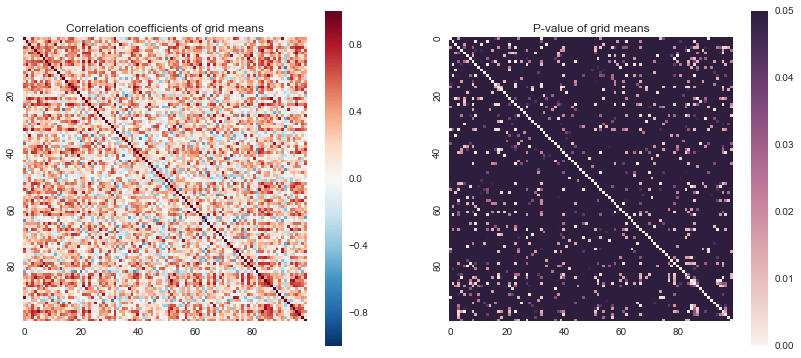

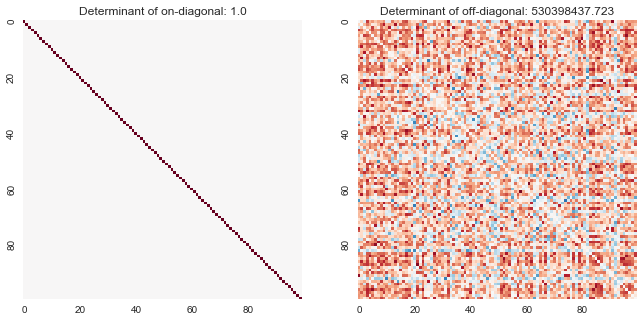

Ratio of on- and off-diagonal determinants: 1.88537508574e-09


In [8]:
out3 = np.array([grid_means[grid_z==z] for z in zvals], dtype=np.float64).T

import scipy.spatial.distance as dist

corr = np.corrcoef(out3)

# # Pearson's correlation coefficients
# corr = dist.squareform(dist.pdist(out, lambda x, y: ss.pearsonr(x, y)[0]))    

# p-values
pval = dist.squareform(dist.pdist(out3, lambda x, y: ss.pearsonr(x, y)[1]))

plt.figure(figsize=(14, 6))
plt.subplot(121)
# plt.figure(figsize=(7,7))
sns.heatmap(corr, square=True, xticklabels=20, yticklabels=20)
plt.title('Correlation coefficients of grid means')
plt.subplot(122)
sns.heatmap(pval, square=True, vmin=0, vmax=0.05, xticklabels=20, yticklabels=20)
plt.title('P-value of grid means')
plt.show()

diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
sns.heatmap(diag, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
sns.heatmap(hollow, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

The ratio of on- to off-diagonal correlations is very small. From this, we conclude that the grid means are not independent of one another, and that this assumption is false. However, as we can see above, the p-values are >0.05 for most off-diagonal correlations, indicating that these might not be very reliable.

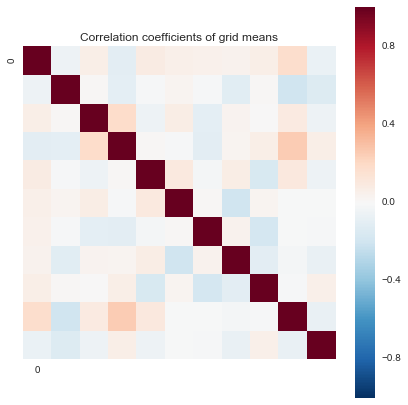

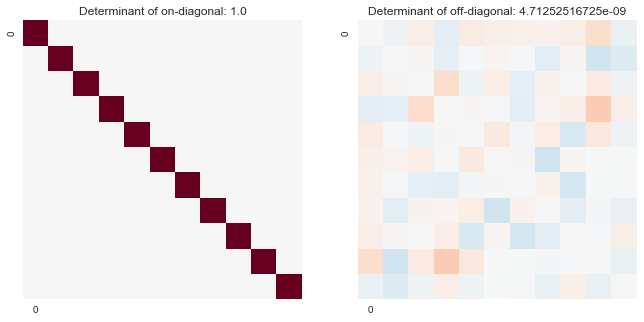

Ratio of on- and off-diagonal determinants: 212200458.249


In [9]:
corr = np.corrcoef(out3.T)

plt.figure(figsize=(7,7))
sns.heatmap(corr, square=True, xticklabels=20, yticklabels=20)
plt.title('Correlation coefficients of grid means')
plt.show()

diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
sns.heatmap(diag, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
sns.heatmap(hollow, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

From the above, we can conclude that the Z layers are independent of one another, as the ratio of on- to off-diagonal correlations is very large. This assumption is true.

#### iii. Identically distributed assumption of grid means

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


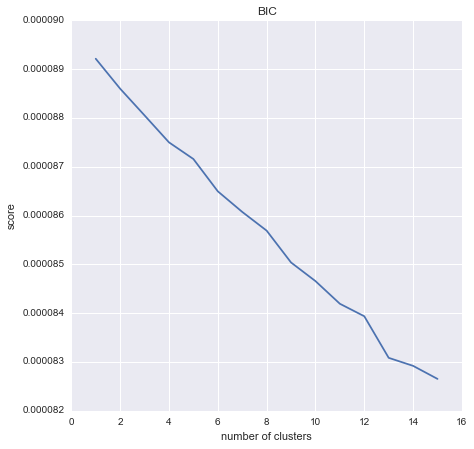

[ 11209.39709071  11287.05780969  11357.19488833  11428.81437489
  11473.55235386  11561.29799927  11617.95047144  11669.93109197
  11759.51185463  11812.41749709  11877.55246115  11913.75507087
  12035.87892078  12059.75953658  12098.74951224]


In [10]:
nclusters = range(1, 16)

bic = np.array(())
for idx in nclusters:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out3)
    bic = np.append(bic, gmm.bic(out3))
plt.figure(figsize=(7, 7))
plt.plot(nclusters, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is 1, we conclude the grid means are identical.

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.


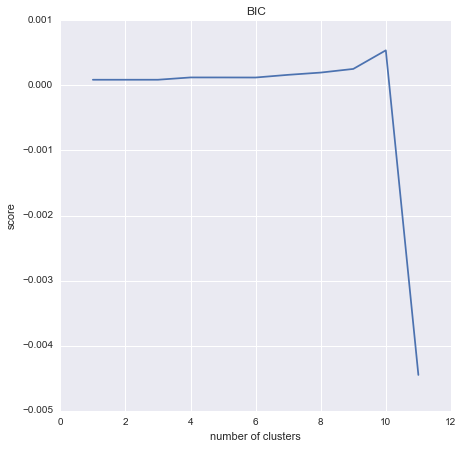

[ 11718.65255732  11714.11940545  11695.17574263   8281.3343228
   8299.00828853   8360.76723713   6217.6680898    5113.77642279
   3976.07277521   1861.13888691   -224.76364162]


In [11]:
nclusters = range(1, 12)

bic = np.array(())
for idx in nclusters:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out3.T)
    bic = np.append(bic, gmm.bic(out3.T))
plt.figure(figsize=(7, 7))
plt.plot(nclusters, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is not 1, we conclude the Z layers are not identical.

#### iv. Class conditional difference assumption between low-density vs. high-density Z layers

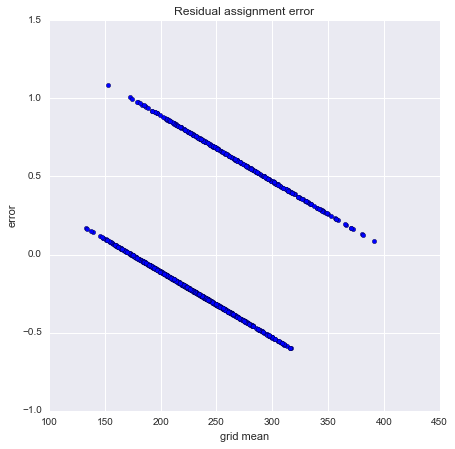

In [12]:
grid_labels = np.array([labels[zvals==z] for z in grid_z])

vals = ss.linregress(grid_means.reshape(-1,1).T, grid_labels.T)
m = vals[0]
c = vals[1]

def comp_value(m, c, data):
    return m.T*data + c

resi = np.array([y-comp_value(m, c, x) for x, y in zip(grid_means, grid_labels)])
    
plt.figure(figsize=(7,7))
plt.scatter(grid_means, resi)
plt.title('Residual assignment error')
plt.xlabel('grid mean')
plt.ylabel('error')
plt.show()

From the above results, we can see that our classifier fails to separate grids based on their mean, so this assumption is false.